# The Central Limit Theorem

The Central Limit Theorem is a statistical concept that says that the sum of many independent random variables tends to be normally distributed, even if the individual variables themselves are not normally distributed.

The Central Limit Theorem is important because it allows us to use parametric tests on non-normally distributed data as long as the sample size is large enough.

In other words, the Central Limit Theorem allows us to use statistical methods that assume data is distributed normally on non-normally distributed data, provided the data is large enough.

In [1]:
import seaborn as sns
import random
import numpy as np
import matplotlib.pyplot as plt

But how can non-normally distributed data be treated as if it is?

To understand this concept, let's consider rolling a fair six-sided die. Each time we roll the die, we get a random number from 1 to 6, with an equal chance of getting each number.

In [18]:
# Roll a fair 6 sided dice

np.random.randint(1,7)

6

What would happen if I repeated this experiment 1,000,000 times?

In [72]:
# Define a function that simulates rolling a dice a given number of times 

def diceroller(trials, rolls):
    '''
    trials = number of trials in experiment
    rolls = number of times dice is rolled

    returns: a numpy array of the sum of the dice for each trial
    '''
    results = np.random.randint(1, 7, size=(trials,rolls)) 
    return np.sum(results, axis=1)

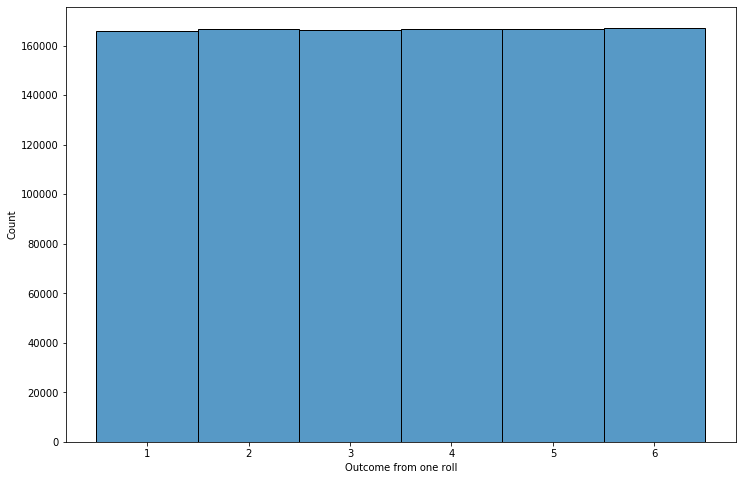

In [77]:
n_rolls = 1
trials=1000000

fig,ax = plt.subplots(figsize=(12,8))
sns.histplot(diceroller(trials, n_rolls), discrete=True,ax=ax)
ax.set_xlabel('Outcome from one roll');

As we would expect, each outcome is roughly the same. The data is clearly not normally distributed.

In this first example, each experiment only contained one dice roll. 

Let's now consider rolling the dice two times, and writing down the sum of the rolls.

Now our outcomes range from 2 (double 1) to 12 (double 6). 

In [74]:
np.random.randint(1,7) + np.random.randint(1,7)

4

What happens if we repeat this experiment 1,000,000 times?

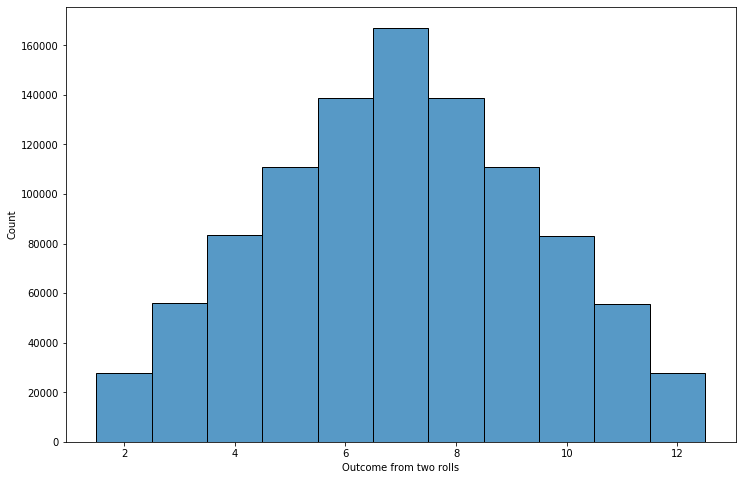

In [76]:
n_rolls = 2
trials=1000000

fig,ax = plt.subplots(figsize=(12,8))
sns.histplot(diceroller(trials, n_rolls), discrete=True,ax=ax)
ax.set_xlabel('Outcome from two rolls');

Now the data is starting to look a bit more normally distributed.

What would happen if each experiment involved three rolls of the dice?

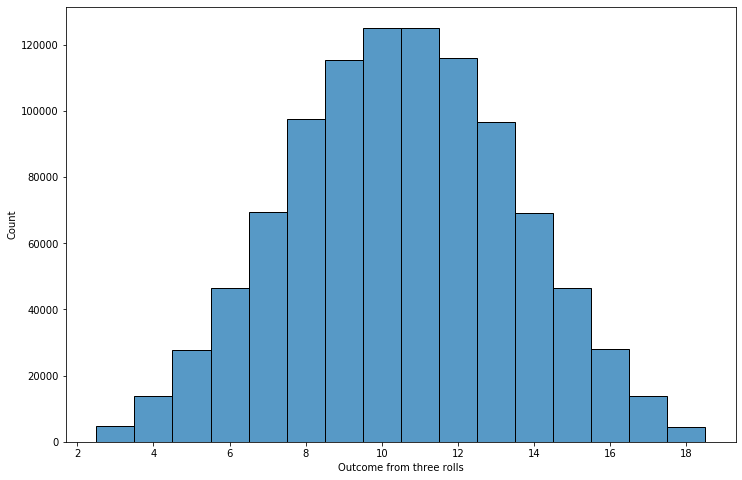

In [78]:
n_rolls = 3
trials=1000000

fig,ax = plt.subplots(figsize=(12,8))
sns.histplot(diceroller(trials, n_rolls), discrete=True,ax=ax)
ax.set_xlabel('Outcome from three rolls');

Or twenty?

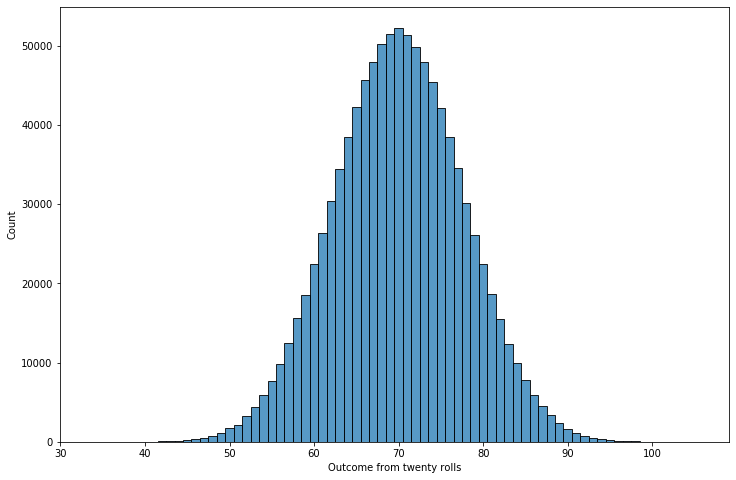

In [79]:
n_rolls = 20
trials=1000000

fig,ax = plt.subplots(figsize=(12,8))
sns.histplot(diceroller(trials, n_rolls), discrete=True,ax=ax)
ax.set_xlabel('Outcome from twenty rolls');

Each time we increased the number of rolls in an experiment we created a larger range of possible outcomes. Through repeating the experiment 1,000,000 times we ended up with a collection of totals, each one representing the sum of many dice rolls. 

By plotting these outcomes we can see that the data forms a normal distribution.

This is the principle behind the Central Limit Theorem, that the sum of many independent random variables tends to follow a normal distribution, even if the individual variables themselves are not normally distributed.

This principle means that when data sets are large (typically greater than 30), then you can use statistical tests that assume normality, even if the data is non-normally distributed.

Going back to our dice example, we previously assumed the dice was fair. Does the Central Limit Theorem work if the dice is biased?

Let's redo the process using a dice that is more likely to roll a number the higher it is:

In [81]:
def diceroller(trials, probability, rolls):
    '''
    trials = number of trials
    probability : list = probability of each face (must sum to 1)

    returns: a numpy array of the sum of the dice for each trial
    '''
    results = np.random.choice(range(1,faces+1), size=(trials, rolls), p=probability)
    return np.sum(results, axis=1)

In [82]:
weights = [6, 5, 4, 3, 2, 1]
# Convert to probabilities
probabilities = [i/sum(weights) for i in weights]
print(probabilities)

[0.2857142857142857, 0.23809523809523808, 0.19047619047619047, 0.14285714285714285, 0.09523809523809523, 0.047619047619047616]


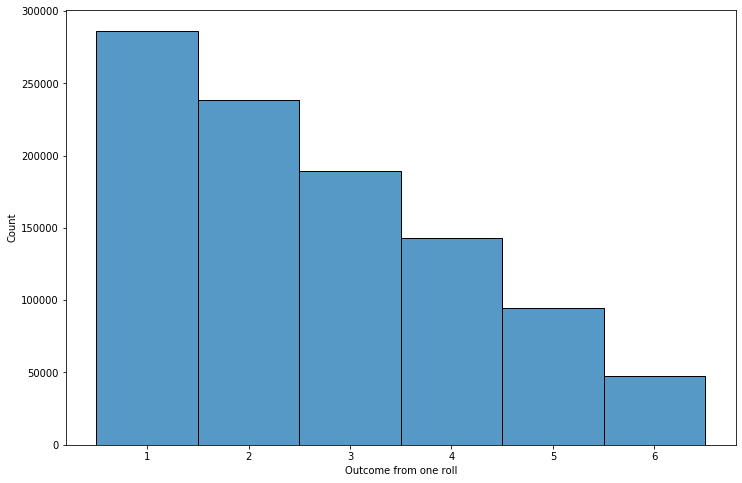

In [83]:
n_rolls = 1
trials=1000000

fig,ax = plt.subplots(figsize=(12,8))
sns.histplot(diceroller(trials, probability = probabilities, rolls = n_rolls), discrete=True)
ax.set_xlabel('Outcome from one roll');

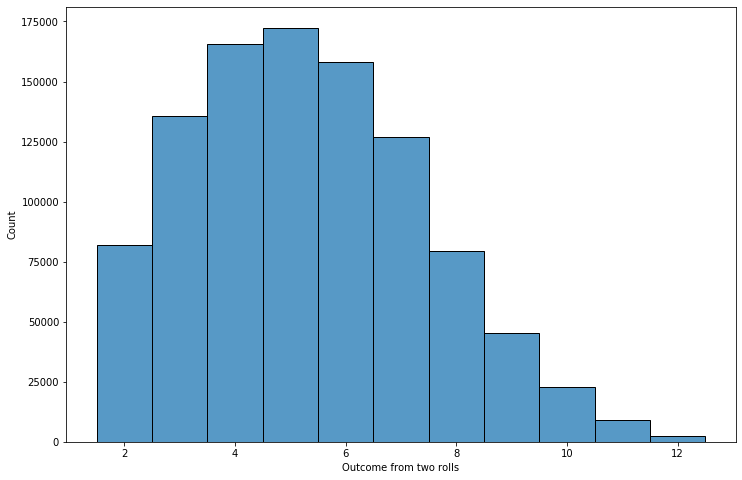

In [84]:
n_rolls = 2
trials=1000000

fig,ax = plt.subplots(figsize=(12,8))
sns.histplot(diceroller(trials, probability = probabilities, rolls = n_rolls), discrete=True)
ax.set_xlabel('Outcome from two rolls');

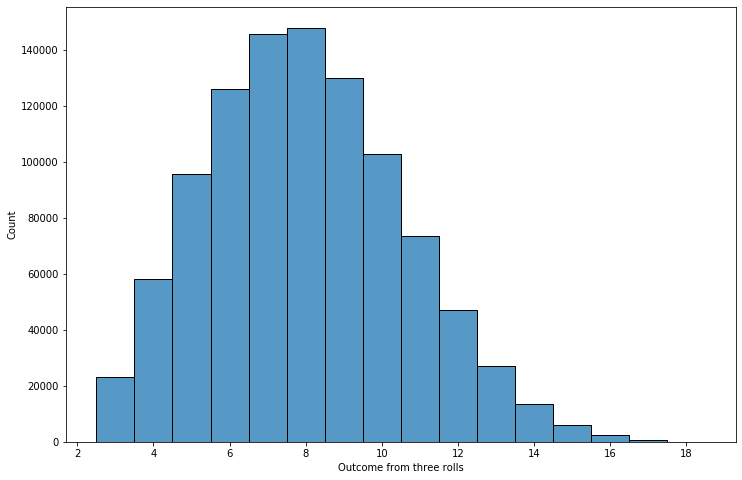

In [85]:
n_rolls = 3
trials=1000000

fig,ax = plt.subplots(figsize=(12,8))
sns.histplot(diceroller(trials, probability = probabilities, rolls = n_rolls), discrete=True)
ax.set_xlabel('Outcome from three rolls');

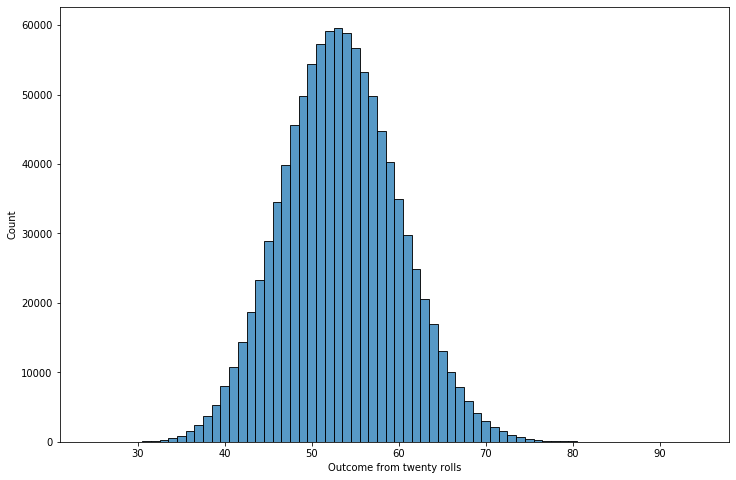

In [86]:
n_rolls = 20
trials=1000000

fig,ax = plt.subplots(figsize=(12,8))
sns.histplot(diceroller(trials, probability = probabilities, rolls = n_rolls), discrete=True)
ax.set_xlabel('Outcome from twenty rolls');

It doesn't matter what the starting distribution is, the Central Limit Theorem still holds